可视化卷积 
参考代码
    
    https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb

In [1]:
#使用VGG16
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
%matplotlib inline


model = VGG16(weights='imagenet')
model.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [2]:
#可视化模型结构
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


#apt-get install graphviz
#pip install pydot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#保存文件
from keras.utils import plot_model
plot_model(model, to_file='model-vgg16.png')

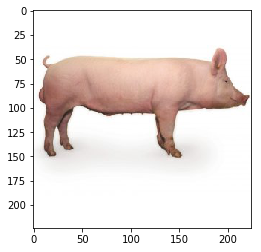

(1, 224, 224, 3)


In [3]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

#小猪的路径
img_path = "../picture/pig.jpg"

#缩放到指定大小 224x224
img = image.load_img(img_path, target_size=(224, 224))


#展示图片
plt.imshow(img)
plt.show()


x = image.img_to_array(img)

# 扩展维度 适配模型输入大小 (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# 图像预处理
x = preprocess_input(x)

print(x.shape)

In [4]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03935335', 'piggy_bank', 0.6222573), ('n02395406', 'hog', 0.3228228), ('n02108915', 'French_bulldog', 0.013370045)]


In [5]:
from keras import models

layer_names=['block1_conv1', 'block3_conv1','block5_conv1']

# 获取指定层的输出:
layer_outputs = [model.get_layer(layer_name).output for layer_name in layer_names]
# 创建新的模型 该模型的输出为指定的层的输出
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [6]:
#获得小猪的输出
activations = activation_model.predict(x)

In [7]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 224, 224, 64)


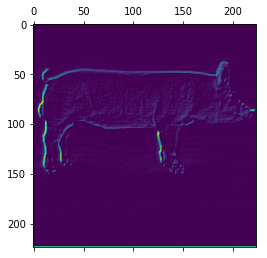

In [8]:
#输出第一层卷积的第一个卷积核的输出
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
plt.show()

#print(first_layer_activation[0, :, :, 0])

/mnt/opt/anaconda2/envs/book5/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


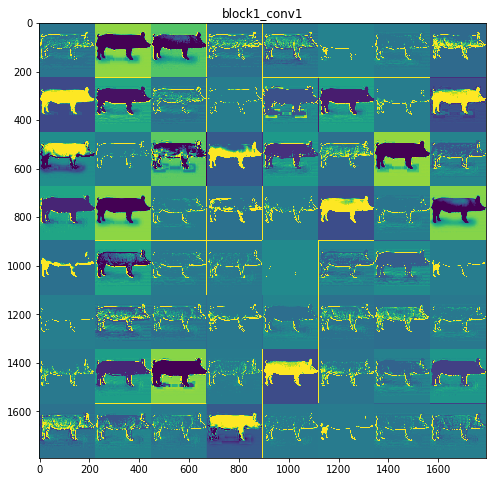

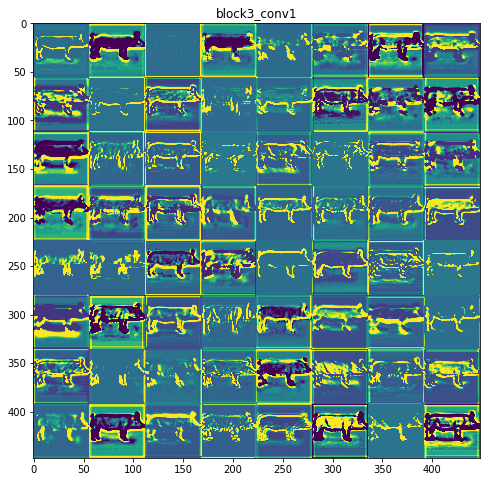

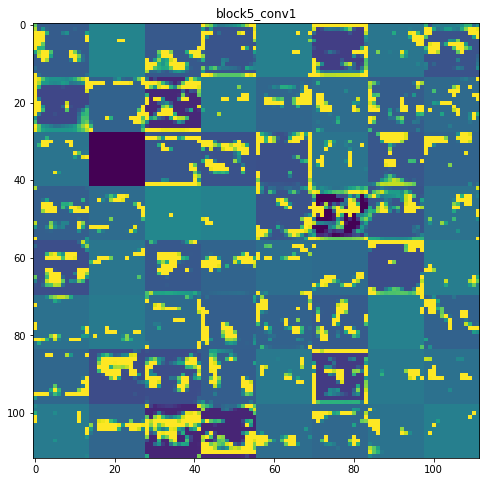

In [9]:
images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations):
    # 获取卷积核的个数
    n_features = layer_activation.shape[-1]

    # 特征图的形状 (1, size, size, n_features)
    size = layer_activation.shape[1]

    #n_cols = n_features // images_per_row
    #最多展现8行
    n_cols=8
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 归一化处理
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            #channel_image *= 64
            #channel_image += 128
            channel_image *= 128
            channel_image += 128
            
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 展示图片
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()